# Mini_Project

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.options.display.max_columns=40
pd.options.display.max_rows = 100

In [4]:
row_data = pd.read_csv("train.csv")

In [4]:
row_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,76466,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,46459,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,11890,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,76483,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,63365,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0


In [160]:
row_data.shape

(43846, 14)

In [6]:
row_data.describe(include="all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,43846.000000,43846,43846,41905,43846,43846,43846.000000,43846.000000,40521.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13514,9829,29356,30776,24430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39189.407198,NaN,NaN,NaN,NaN,NaN,1.251950,34.812503,3.327114,5.867057,0.351868,0.022807,63.348128,0.085162
std,22578.548145,NaN,NaN,NaN,NaN,NaN,0.609719,7.662864,1.259761,4.273456,0.477558,0.149290,13.359844,0.279125
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19655.250000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39262.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58710.750000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [7]:
row_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
df = row_data.copy()
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,76466,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,46459,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,11890,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0


In [9]:
df.drop(['employee_id'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

department                 0
region                     0
education               1941
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3325
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
# check mode for future Preprocessing
mode = df['education'].mode()
mode[0]

"Bachelor's"

In [12]:
# fil NAN values by Zero because we can't judge any person previous year rating.

df['previous_year_rating'].fillna(0,inplace =True)

In [13]:
# Firstly, I try remove education 

# df.dropna(subset=['education'],axis = 0,inplace=True)

# after it i try fillna values by mode
df['education'].fillna(mode[0],inplace=True)

In [14]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Separate all numerical values and category values.

##### Numerical column

In [15]:
Numeric_col = df.select_dtypes(exclude="object")

In [16]:
# Find relationship between all numerical_col and 'is to prompt' using pearson method

<AxesSubplot:>

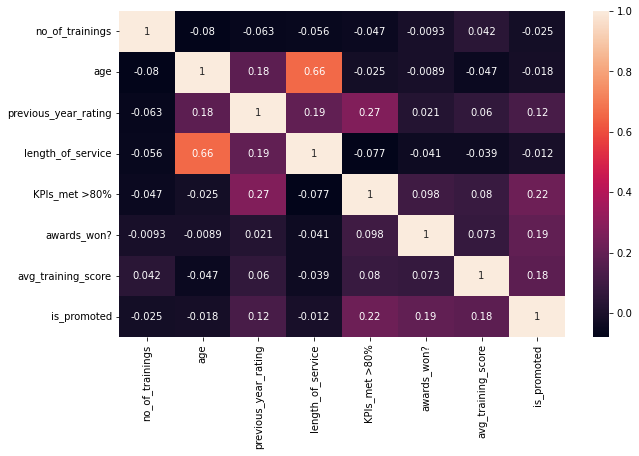

In [17]:
relation=Numeric_col.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(relation,annot=True)

In [18]:
# length,previous_year

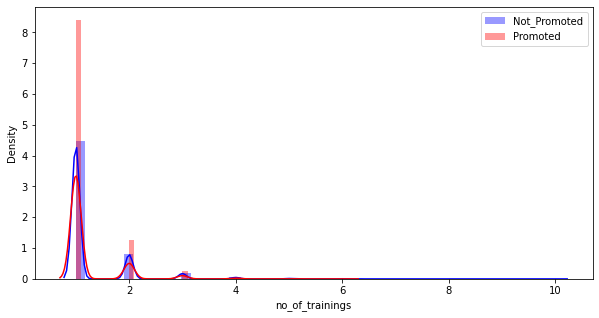

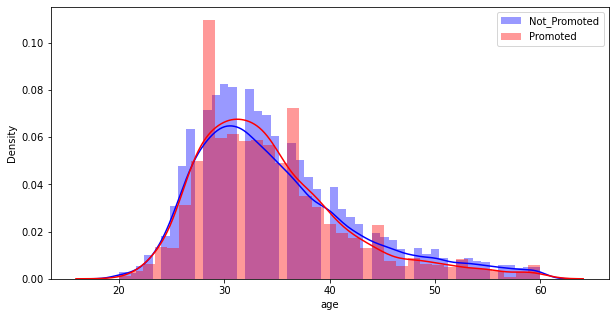

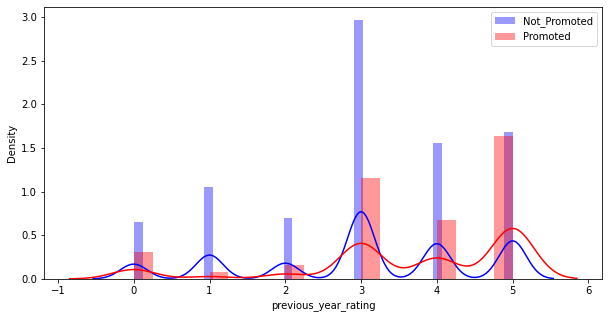

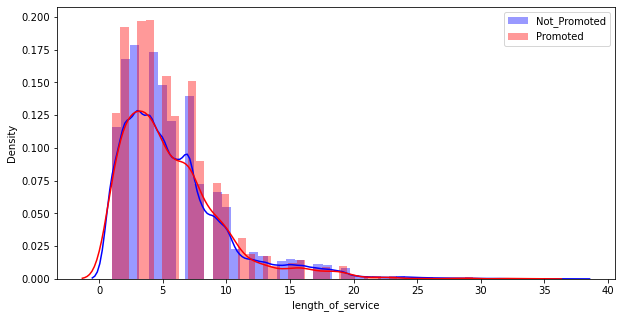

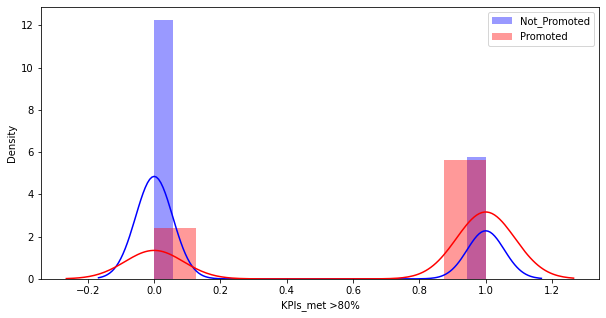

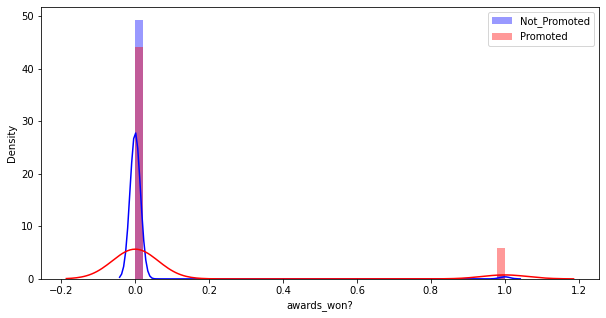

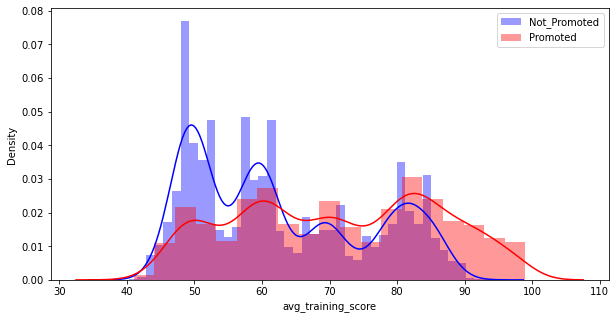

In [19]:
numeric_col = Numeric_col.columns
for col in range(len(numeric_col)-1):
    plt.figure(figsize=(10,5))
    sns.distplot(Numeric_col[numeric_col[col]][Numeric_col['is_promoted']==0],color='b',label="Not_Promoted")
    sns.distplot(Numeric_col[numeric_col[col]][Numeric_col['is_promoted']==1],color='r',label="Promoted")
    plt.legend()




##### Categorical column

In [169]:
categorical_col = df.select_dtypes(include='object')

col = categorical_col.columns

### get_dummies method

In [21]:
# df = pd.get_dummies(df,columns=col,drop_first=True)

In [22]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,...,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,34,3.0,7,0,0,52,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,50,3.0,19,0,0,76,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,40,3.0,7,0,0,79,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,33,5.0,6,0,0,48,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,34,3.0,8,0,0,67,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df.shape

(43846, 54)

##### use spearsonr method and Visualization. ----> Before apply get_dummies method

In [171]:
# for col in categorical_col:
#     cofi,p_value = stats.spearmanr(categorical_col[col],df.is_promoted)
#     print(f'The coefficient of {col} -->{cofi}\nP_value -->{p_value}')
#     print(p_value<0.05,'\n')

In [167]:
# for col in categorical_col:
#     plt.figure(figsize=(10,5))
#     sns.countplot(x=col,hue='is_promoted',data =df)
#     plt.xticks(rotation=90)

In [26]:
# sns.pairplot(df)

In [27]:
# X = df[['department', 'education','age','gender','length_of_service', 'previous_year_rating','KPIs_met >80%', 'avg_training_score']]

# trying

X = df.drop(['is_promoted'],axis = 1)
Y = df['is_promoted']

In [159]:
# X = X.drop(['age','region_region_2'],axis=1)
vif_df = pd.DataFrame({'columns': X.columns})
vif_df['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_df

,columns,vif
0,no_of_trainings,5.377168
1,previous_year_rating,6.125932
2,length_of_service,3.461066
3,KPIs_met >80%,1.745044
4,awards_won?,1.041422
5,avg_training_score,17.173205
6,department_Finance,1.294138
7,department_HR,1.252637
8,department_Legal,1.117063
9,department_Operations,2.483731


In [ ]:
Y.value_counts()

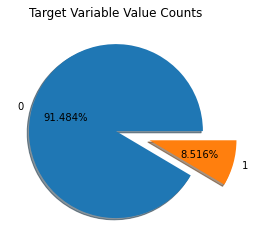

In [73]:
# get the set of distinct classes
labels = Y.unique()

# get the count of each class
sizes = Y.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%',explode =[0,0.4],shadow = True)
ax.set_title('Target Variable Value Counts')
plt.show()

### Spliting_data

In [74]:
train = 0.7
test = 0.1
holdout = 0.1

In [75]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [76]:
X_temp,X_holdout,y_temp,y_holdout = train_test_split(X,Y,test_size=holdout,stratify=Y,random_state=121)

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X_temp,y_temp,test_size=0.1,random_state=121)

In [78]:
from sklearn.utils.class_weight import compute_sample_weight

In [79]:
w_train = compute_sample_weight('balanced',y_train)

## Build_Models

### logistic_Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
Lr = LogisticRegression(class_weight='balanced')

In [82]:
para = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6],'max_iter':[100,200,300]}

In [83]:
# Use randomized search for best parameters

In [84]:
RS = RandomizedSearchCV(Lr,param_distributions=para,cv = 5,n_iter=5,n_jobs=4)

In [85]:
RS.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=5, n_jobs=4,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [86]:
print(RS.best_params_)

{'penalty': 'l2', 'max_iter': 200, 'C': 4}


In [87]:
Lr_pred = RS.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix

In [89]:
print(classification_report(y_test,Lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      3611
           1       0.24      0.80      0.36       336

    accuracy                           0.76      3947
   macro avg       0.61      0.78      0.61      3947
weighted avg       0.91      0.76      0.81      3947



In [90]:
Lr_f1_score= f1_score(y_test,Lr_pred)

### Decision tree Algorithm

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
DTree = DecisionTreeClassifier(criterion='entropy')

In [93]:
DTree.fit(X_train,y_train,sample_weight=w_train)

DecisionTreeClassifier(criterion='entropy')

In [94]:
DTree_pred = DTree.predict(X_test)

In [95]:
DTree_f1_score = f1_score(y_test,DTree_pred)
print(classification_report(y_test,DTree_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3611
           1       0.41      0.43      0.42       336

    accuracy                           0.90      3947
   macro avg       0.68      0.69      0.68      3947
weighted avg       0.90      0.90      0.90      3947



### KNN_Algorithm

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [98]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
KNN_pred = KNN.predict(X_test)

In [100]:
KNN_f1_score = f1_score(y_test,KNN_pred)

### Navie_bayes Algorithm

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
NavB = GaussianNB().fit(X_train,y_train,sample_weight=w_train)

In [103]:
NavB_pred = NavB.predict(X_test)

In [104]:
NavB_f1_score = f1_score(y_test,KNN_pred)

### SVM Algorithm

In [105]:
from sklearn.svm import LinearSVC

In [106]:
SVM = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

In [107]:
SVM.fit(X_train,y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [108]:
SVM_pred = SVM.predict(X_test)

In [109]:
SVM_f1_score = f1_score(y_test,SVM_pred)

## All_Algo_Result

In [110]:
result = [Lr_f1_score, DTree_f1_score,NavB_f1_score,SVM_f1_score]
result_data = pd.DataFrame(result,index = ['Logistic','Decision tree','Navie Bayes',"SVM"],columns=['F1-score'])

In [111]:
result_data

,F1-score
Logistic,0.364252
Decision tree,0.422125
Navie Bayes,0.347639
SVM,0.000000


## use Decision tree because it gives better f1-score all 

In [136]:
hold_pred = DTree.predict(X_holdout)

In [137]:
print(f1_score(y_holdout,hold_pred))

0.4100529100529101


# test_csv

In [138]:
test_df = pd.read_csv('test.csv')
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,13463,Technology,region_7,Bachelor's,m,sourcing,1,33,4.0,7,0,0,79
1,16160,Technology,region_23,Bachelor's,m,other,1,40,3.0,5,1,1,79
2,15840,Analytics,region_19,Bachelor's,m,other,1,40,3.0,5,0,0,86
3,28325,Procurement,region_27,Bachelor's,f,sourcing,3,26,3.0,2,1,1,69
4,23651,Sales & Marketing,region_6,Bachelor's,m,sourcing,1,29,4.0,6,0,0,50


In [139]:
test_df.isnull().sum()

employee_id               0
department                0
region                    0
education               468
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    799
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
dtype: int64

In [140]:
test_df['previous_year_rating'].fillna(0,inplace =True)


In [141]:
test_df['education'].fillna(mode[0],inplace =True)

In [142]:
test_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [143]:
categorical = test_df.select_dtypes(include='object')
col = categorical.columns

In [144]:
test_df = pd.get_dummies(test_df,columns=col,drop_first=True)

In [145]:

test_df.drop(['employee_id','age','region_region_2'],axis = 1,inplace=True)

In [146]:
test_df.head(2)

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,...,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,4.0,7,0,0,79,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,3.0,5,1,1,79,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [147]:
test_pred = DTree.predict(test_df)

In [148]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

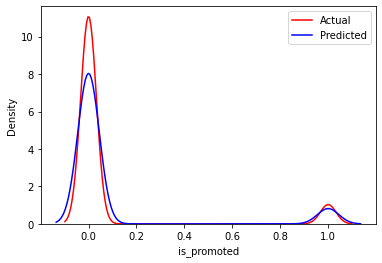

In [150]:
ax1 = sns.distplot(Y,hist = False,color='r',label = "Actual")
sns.distplot(test_pred,hist= False,color="blue",label= "Predicted",ax = ax1)
plt.legend()

In [154]:
pred_df = pd.DataFrame(test_pred) 

In [155]:
sample = pd.read_csv('sample_submission.csv')

In [156]:
sample['is_promoted'] = pred_df

In [163]:
sample.to_csv('RahulSharma_Submission.csv')